In [133]:
import pandas as pd
from matplotlib import pyplot
from sklearn import preprocessing
import seaborn as sns
import datetime as dt
pyplot.rcParams["figure.figsize"] = (16,9)

#### Import Price Data

In [2]:
price_data = pd.read_csv("../price data/iDhP/candles_btc-usd_1h.csv")
price_data.head()

,timestamp,exchange,market,base,quote,from,to,open,close,high,low,volume_base,volume_quote
0,1293840000000000000,cccagg,btc-usd,btc,usd,1293836400000000000,1293840000000000000,0.29200,0.29200,0.3,0.292,117.551667,35.08125
1,1293843600000000000,cccagg,btc-usd,btc,usd,1293840000000000000,1293843600000000000,0.29997,0.29997,0.3,0.289,223.004583,66.02750
2,1293847200000000000,cccagg,btc-usd,btc,usd,1293843600000000000,1293847200000000000,0.29997,0.29997,0.3,0.289,223.004583,66.02750
3,1293850800000000000,cccagg,btc-usd,btc,usd,1293847200000000000,1293850800000000000,0.29997,0.29997,0.3,0.289,223.004583,66.02750
4,1293854400000000000,cccagg,btc-usd,btc,usd,1293850800000000000,1293854400000000000,0.29997,0.29997,0.3,0.289,223.004583,66.02750


In [3]:
new_price_data = price_data.copy()
new_price_data['timestamp'] = [pd.Timestamp(t) for t in price_data['timestamp']]
new_price_data['from'] = [pd.Timestamp(t) for t in price_data['from']]
new_price_data['to'] = [pd.Timestamp(t) for t in price_data['to']]
new_price_data.head()

,timestamp,exchange,market,base,quote,from,to,open,close,high,low,volume_base,volume_quote
0,2011-01-01 00:00:00,cccagg,btc-usd,btc,usd,2010-12-31 23:00:00,2011-01-01 00:00:00,0.29200,0.29200,0.3,0.292,117.551667,35.08125
1,2011-01-01 01:00:00,cccagg,btc-usd,btc,usd,2011-01-01 00:00:00,2011-01-01 01:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
2,2011-01-01 02:00:00,cccagg,btc-usd,btc,usd,2011-01-01 01:00:00,2011-01-01 02:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
3,2011-01-01 03:00:00,cccagg,btc-usd,btc,usd,2011-01-01 02:00:00,2011-01-01 03:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
4,2011-01-01 04:00:00,cccagg,btc-usd,btc,usd,2011-01-01 03:00:00,2011-01-01 04:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750


#### Import Wikipedia User Activity Data

In [4]:
wiki_data = pd.read_csv("../data connectors/wikipedia/data.csv")
wiki_data.head()

,Unnamed: 0,article,timestamp,views
0,0,Bitcoin,2015070100,13137
1,1,Bitcoin,2015070200,9938
2,2,Bitcoin,2015070300,8498
3,3,Bitcoin,2015070400,9113
4,4,Bitcoin,2015070500,8908


In [5]:
new_wiki_data = wiki_data[wiki_data['article'] == 'Bitcoin'].copy()
new_wiki_data.drop(columns=wiki_data.columns.to_list()[:1],inplace=True)
new_wiki_data['timestamp'] = new_wiki_data['timestamp'].astype('str')
new_wiki_data['timestamp'] = [pd.Timestamp(year=int(t[:4]),month=int(t[4:6]),day=int(t[6:8]),hour=0) for t in new_wiki_data['timestamp'].to_list()]
new_wiki_data.head()

,article,timestamp,views
0,Bitcoin,2015-07-01,13137
1,Bitcoin,2015-07-02,9938
2,Bitcoin,2015-07-03,8498
3,Bitcoin,2015-07-04,9113
4,Bitcoin,2015-07-05,8908


#### Import Google Trends Data

In [6]:
trends_data = pd.read_csv("../data connectors/google trends/normalized_bitcoin_2016-01-04-2018-01-01.csv")
trends_data.head()

,date,value,isPartial,interval,keyword,normalized_value
0,2016-01-04 00:00:00,63,False,2016-01-04 -> 2016-01-11,bitcoin,1.635509
1,2016-01-04 01:00:00,62,False,2016-01-04 -> 2016-01-11,bitcoin,1.609549
2,2016-01-04 02:00:00,60,False,2016-01-04 -> 2016-01-11,bitcoin,1.557628
3,2016-01-04 03:00:00,62,False,2016-01-04 -> 2016-01-11,bitcoin,1.609549
4,2016-01-04 04:00:00,66,False,2016-01-04 -> 2016-01-11,bitcoin,1.713391


In [7]:
new_trends_data = trends_data.copy()
new_trends_data['date'] = [pd.Timestamp(d) for d in trends_data['date']]
new_trends_data.head()

,date,value,isPartial,interval,keyword,normalized_value
0,2016-01-04 00:00:00,63,False,2016-01-04 -> 2016-01-11,bitcoin,1.635509
1,2016-01-04 01:00:00,62,False,2016-01-04 -> 2016-01-11,bitcoin,1.609549
2,2016-01-04 02:00:00,60,False,2016-01-04 -> 2016-01-11,bitcoin,1.557628
3,2016-01-04 03:00:00,62,False,2016-01-04 -> 2016-01-11,bitcoin,1.609549
4,2016-01-04 04:00:00,66,False,2016-01-04 -> 2016-01-11,bitcoin,1.713391


### Plotting data

In [8]:
new_price_data.index = new_price_data['timestamp']
new_wiki_data.index = new_wiki_data['timestamp']
new_trends_data.index = new_trends_data['date']

In [9]:
start_date = '2016-01-04T00'
end_date = '2018-01-01T00'

In [10]:
new_price_data = new_price_data[start_date:end_date].copy()
new_wiki_data = new_wiki_data[start_date:end_date].copy()
new_trends_data = new_trends_data[start_date:end_date].copy()

#### Normalize all features

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()

price_val = new_price_data['open'].values
normalized_price_val = min_max_scaler.fit_transform(price_val.reshape(price_val.shape[0],1))
new_price_data['normalized_open'] = normalized_price_val.reshape(-1,1)

wiki_view = new_wiki_data['views'].values
normalized_wiki_view = min_max_scaler.fit_transform(wiki_view.reshape(wiki_view.shape[0],1))
new_wiki_data['normalized_views'] = normalized_wiki_view.reshape(-1,1)

trends_val = new_trends_data['normalized_value'].values
normalized_trend_val = min_max_scaler.fit_transform(trends_val.reshape(trends_val.shape[0],1))
new_trends_data['normalized_trends'] = normalized_trend_val.reshape(-1,1)

In [12]:
new_price_data.head()

,timestamp,exchange,market,base,quote,from,to,open,close,high,low,volume_base,volume_quote,normalized_open
timestamp,,,,,,,,,,,,,,
2016-01-04 00:00:00,2016-01-04 00:00:00,cccagg,btc-usd,btc,usd,2016-01-03 23:00:00,2016-01-04 00:00:00,427.79,431.08,431.21,427.58,2383.36,1021764.05,0.003562
2016-01-04 01:00:00,2016-01-04 01:00:00,cccagg,btc-usd,btc,usd,2016-01-04 00:00:00,2016-01-04 01:00:00,431.08,430.58,431.53,429.70,1240.28,536377.38,0.003731
2016-01-04 02:00:00,2016-01-04 02:00:00,cccagg,btc-usd,btc,usd,2016-01-04 01:00:00,2016-01-04 02:00:00,430.58,430.16,431.03,429.17,1650.31,711584.15,0.003705
2016-01-04 03:00:00,2016-01-04 03:00:00,cccagg,btc-usd,btc,usd,2016-01-04 02:00:00,2016-01-04 03:00:00,430.16,430.08,431.06,428.78,1814.28,779901.85,0.003684
2016-01-04 04:00:00,2016-01-04 04:00:00,cccagg,btc-usd,btc,usd,2016-01-04 03:00:00,2016-01-04 04:00:00,430.08,431.13,432.98,430.52,1752.87,759067.03,0.003680


In [13]:
new_wiki_data.head()

,article,timestamp,views,normalized_views
timestamp,,,,
2016-01-04,Bitcoin,2016-01-04,10785,0.013640
2016-01-05,Bitcoin,2016-01-05,10522,0.012870
2016-01-06,Bitcoin,2016-01-06,9285,0.009248
2016-01-07,Bitcoin,2016-01-07,10956,0.014141
2016-01-08,Bitcoin,2016-01-08,9452,0.009737


In [14]:
new_trends_data.head()

,date,value,isPartial,interval,keyword,normalized_value,normalized_trends
date,,,,,,,
2016-01-04 00:00:00,2016-01-04 00:00:00,63,False,2016-01-04 -> 2016-01-11,bitcoin,1.635509,0.005641
2016-01-04 01:00:00,2016-01-04 01:00:00,62,False,2016-01-04 -> 2016-01-11,bitcoin,1.609549,0.005379
2016-01-04 02:00:00,2016-01-04 02:00:00,60,False,2016-01-04 -> 2016-01-11,bitcoin,1.557628,0.004854
2016-01-04 03:00:00,2016-01-04 03:00:00,62,False,2016-01-04 -> 2016-01-11,bitcoin,1.609549,0.005379
2016-01-04 04:00:00,2016-01-04 04:00:00,66,False,2016-01-04 -> 2016-01-11,bitcoin,1.713391,0.006428


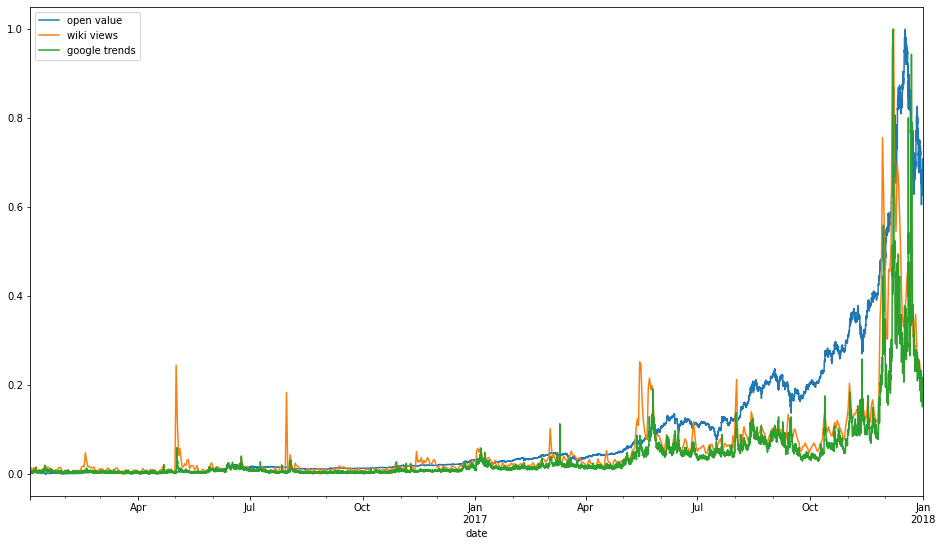

In [15]:
new_price_data['normalized_open'].plot(label='open value')
new_wiki_data['normalized_views'].plot(label='wiki views')
new_trends_data['normalized_trends'].plot(label='google trends')

pyplot.legend()
pyplot.show()

### Overall Pearson Correlation Factors

In [17]:
new_price_data['normalized_open'].corr(new_trends_data['normalized_trends'])

0.9004471079653271

In [18]:
new_price_data['normalized_open'].corr(new_wiki_data['normalized_views'])

0.8545944239943424

In [19]:
new_trends_data['normalized_trends'].corr(new_wiki_data['normalized_views'])

0.9288478339453335

### Windowed Time Lagged Cross Correlation (trends<->price)

In [78]:
new_trends_data.drop_duplicates(subset=['date'],inplace=True)
new_trends_data.head()

,date,value,isPartial,interval,keyword,normalized_value,normalized_trends
date,,,,,,,
2016-01-04 00:00:00,2016-01-04 00:00:00,63,False,2016-01-04 -> 2016-01-11,bitcoin,1.635509,0.005641
2016-01-04 01:00:00,2016-01-04 01:00:00,62,False,2016-01-04 -> 2016-01-11,bitcoin,1.609549,0.005379
2016-01-04 02:00:00,2016-01-04 02:00:00,60,False,2016-01-04 -> 2016-01-11,bitcoin,1.557628,0.004854
2016-01-04 03:00:00,2016-01-04 03:00:00,62,False,2016-01-04 -> 2016-01-11,bitcoin,1.609549,0.005379
2016-01-04 04:00:00,2016-01-04 04:00:00,66,False,2016-01-04 -> 2016-01-11,bitcoin,1.713391,0.006428


In [79]:
new_price_data.head()

,timestamp,exchange,market,base,quote,from,to,open,close,high,low,volume_base,volume_quote,normalized_open
timestamp,,,,,,,,,,,,,,
2016-01-04 00:00:00,2016-01-04 00:00:00,cccagg,btc-usd,btc,usd,2016-01-03 23:00:00,2016-01-04 00:00:00,427.79,431.08,431.21,427.58,2383.36,1021764.05,0.003562
2016-01-04 01:00:00,2016-01-04 01:00:00,cccagg,btc-usd,btc,usd,2016-01-04 00:00:00,2016-01-04 01:00:00,431.08,430.58,431.53,429.70,1240.28,536377.38,0.003731
2016-01-04 02:00:00,2016-01-04 02:00:00,cccagg,btc-usd,btc,usd,2016-01-04 01:00:00,2016-01-04 02:00:00,430.58,430.16,431.03,429.17,1650.31,711584.15,0.003705
2016-01-04 03:00:00,2016-01-04 03:00:00,cccagg,btc-usd,btc,usd,2016-01-04 02:00:00,2016-01-04 03:00:00,430.16,430.08,431.06,428.78,1814.28,779901.85,0.003684
2016-01-04 04:00:00,2016-01-04 04:00:00,cccagg,btc-usd,btc,usd,2016-01-04 03:00:00,2016-01-04 04:00:00,430.08,431.13,432.98,430.52,1752.87,759067.03,0.003680


In [80]:
print(new_trends_data.shape)
print(new_price_data.shape)

(17473, 7)
(17473, 14)


In [92]:
price_d = new_price_data['2017-05-01':'2017-07-01']
trends_d = new_trends_data['2017-05-01':'2017-07-01']

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


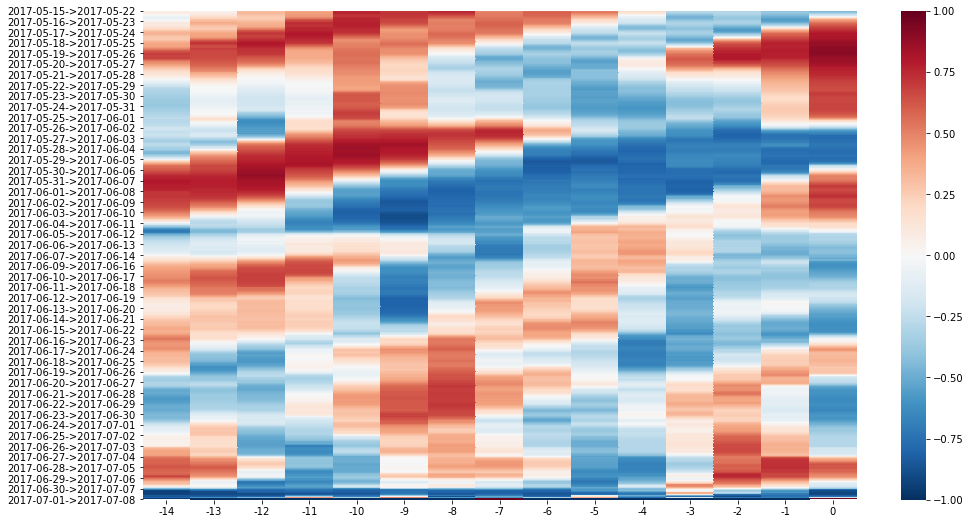

In [155]:
corrs = pd.DataFrame()

offset = 14 # days
ts_len = 7 # days
epoch_len = 24 #1 day = 24 hours

day_index = list()
for t in range(price_d.shape[0]-offset*epoch_len):
    ts_1 = pd.Series(price_d.iloc[t+offset*epoch_len:t+offset*epoch_len+ts_len*epoch_len]['normalized_open'].values)
    day = price_d.iloc[t+offset*epoch_len:t+offset*epoch_len+ts_len*epoch_len]['timestamp'].to_list()[0]
    day2 = day+dt.timedelta(days=7)
    day_index.append(day.strftime('%Y-%m-%d')+'->'+day2.strftime('%Y-%m-%d'))
    
    corrs_ = list()
    for o in range(offset+1):
        ts_2 = pd.Series(trends_d.iloc[t+o*epoch_len:t+o*epoch_len+ts_len*epoch_len]['normalized_trends'].values)
        
        corr = ts_1.corr(ts_2)
        corrs_.append(corr)
        
    corrs = corrs.append(pd.DataFrame([corrs_],columns=[str(i-14) for i in range(offset+1)]),ignore_index=True)
corrs.index = day_index
sns.heatmap(corrs,cmap='RdBu_r')